# SVM и его ядра
__Суммарное количество баллов: 10__

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
from mlxtend.plotting import plot_decision_regions as  pdr
from sklearn.ensemble import RandomForestClassifier as rfc

In [52]:
def plot_roc_curve(y_test, p_pred):
    positive_samples = sum(1 for y in y_test if y == 0)
    tpr = []
    fpr = []
    for w in np.arange(-0.01, 1.02, 0.01):
        y_pred = [(0 if p.get(0, 0) > w else 1) for p in p_pred]
        tpr.append(sum(1 for yp, yt in zip(y_pred, y_test) if yp == 0 and yt == 0) / positive_samples)
        fpr.append(sum(1 for yp, yt in zip(y_pred, y_test) if yp == 0 and yt != 0) / (len(y_test) - positive_samples))
    plt.figure(figsize = (7, 7))
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.xlim(-0.01, 1.01)
    plt.ylim(-0.01, 1.01)
    plt.tight_layout()
    plt.show()

In [53]:
Cancer_path = './hw7_data/cancer.csv'
Spam_path = './hw7_data/spam.csv'

In [54]:
def read_cancer_dataset(path_to_csv):
    df = pd.read_csv(path_to_csv)
    y = [1 if i == 'M' else 0 for i in df['label']]
    return np.asarray(df.drop("label", axis=1)), np.asarray(y)

def read_spam_dataset(path_to_csv):
    df = pd.read_csv(path_to_csv, header=0)
    y = df["label"]
    return np.asarray(df.drop("label", axis=1)), np.asarray(y.values)

In [56]:
X_cancer, y_cancer = read_cancer_dataset(Cancer_path)
X_spam, y_spam = read_spam_dataset(Spam_path)

### Задание 1 (7 баллов)

Примените метод SVM (например, из библиотеки sklearn) для датасета blobs2.

Визуализируйте результат (разбиение плоскости и опорные вектора) при разных вариантах ядер (линейное; полиномиальное степеней 2,3,5; RBF).

In [2]:
df = pd.read_csv('./hw7_data/blobs2.csv')
X, y = df.drop('label', axis=1), df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2)

C:\Users\Alexo\miniconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:316: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  ax.scatter(x_data,


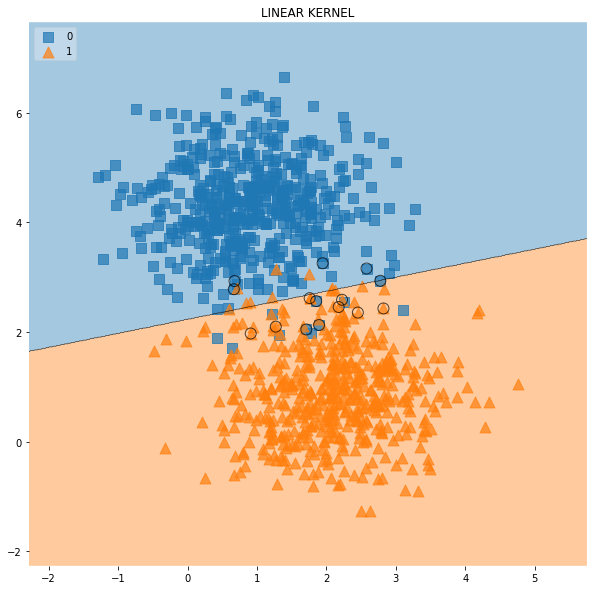

In [4]:
c = SVC(kernel='linear')
c.fit(X_train, y_train)
s_vec = c.support_vectors_
plt.figure(figsize=(10, 10))
plt.title('LINEAR KERNEL')
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.4}
scatter_highlight_kwargs = {'s': 120,  'edgecolor':'k', 'alpha': 0.7}
pdr(np.array(X), np.array(y), clf=c, X_highlight=s_vec, scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs, legend=2)
plt.show()

C:\Users\Alexo\miniconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:316: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  ax.scatter(x_data,


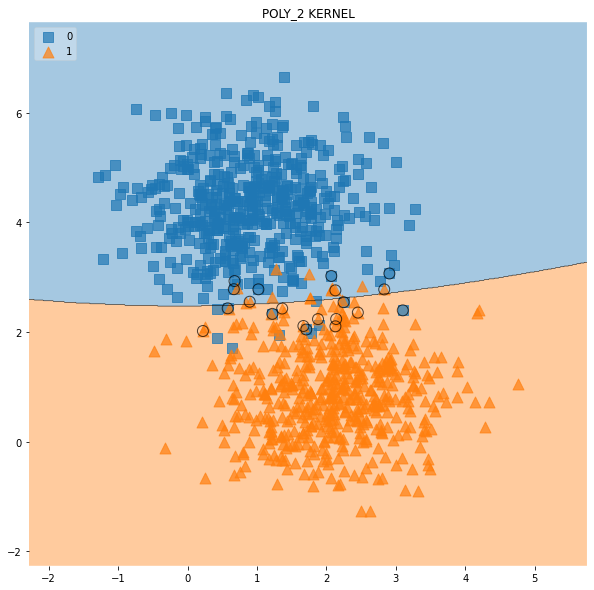

In [46]:
c = SVC(kernel='poly', degree=2)
c.fit(X_train, y_train)
s_vec = c.support_vectors_
plt.figure(figsize=(10, 10))
plt.title('POLY_2 KERNEL')
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.4}
scatter_highlight_kwargs = {'s': 120,  'edgecolor':'k', 'alpha': 0.7}
pdr(np.array(X), np.array(y), clf=c, X_highlight=s_vec, scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs, legend=2)
plt.show()

C:\Users\Alexo\miniconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:316: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  ax.scatter(x_data,


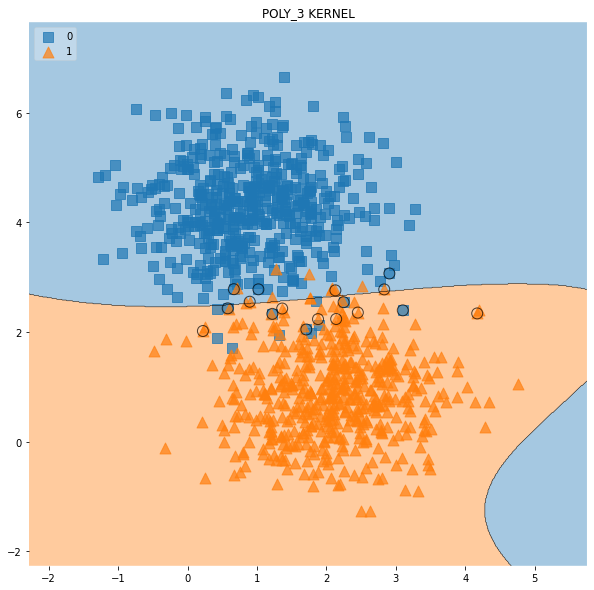

In [50]:
c = SVC(kernel='poly', degree=3)
c.fit(X_train, y_train)
s_vec = c.support_vectors_
plt.figure(figsize=(10, 10))
plt.title('POLY_3 KERNEL')
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.4}
scatter_highlight_kwargs = {'s': 120,  'edgecolor':'k', 'alpha': 0.7}
pdr(np.array(X), np.array(y), clf=c, X_highlight=s_vec, scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs, legend=2)
plt.show()

C:\Users\Alexo\miniconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:316: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  ax.scatter(x_data,


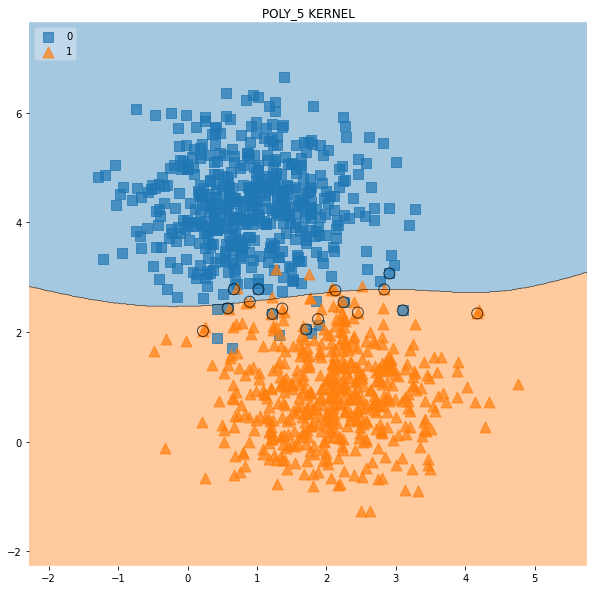

In [49]:
c = SVC(kernel='poly', degree=5)
c.fit(X_train, y_train)
s_vec = c.support_vectors_
plt.figure(figsize=(10, 10))
plt.title('POLY_5 KERNEL')
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.4}
scatter_highlight_kwargs = {'s': 120,  'edgecolor':'k', 'alpha': 0.7}
pdr(np.array(X), np.array(y), clf=c, X_highlight=s_vec, scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs, legend=2)
plt.show()

C:\Users\Alexo\miniconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:316: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  ax.scatter(x_data,


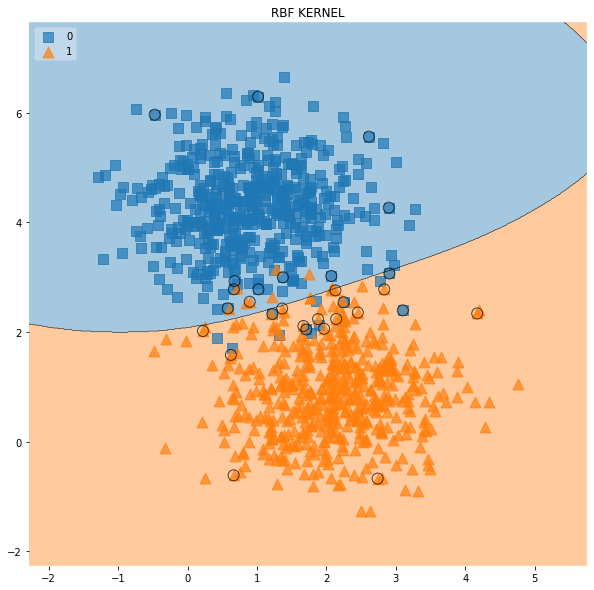

In [51]:
c = SVC(kernel='rbf')
c.fit(X_train, y_train)
s_vec = c.support_vectors_
plt.figure(figsize=(10, 10))
plt.title('RBF KERNEL')
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.4}
scatter_highlight_kwargs = {'s': 120,  'edgecolor':'k', 'alpha': 0.7}
pdr(np.array(X), np.array(y), clf=c, X_highlight=s_vec, scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs, legend=2)
plt.show()

### Задание 2 (3 балла)

Примените метод SVM на датасетах cancer и spam, разбитый предварительно на train (80%) и validate (20%). 

Сравните время работы SVM и Random Forest при близкой точности.

## Cancer dataset

Wall time: 43 ms
----SVM----
AUC=0.8989864864864865
accuracy=0.9210526315789473


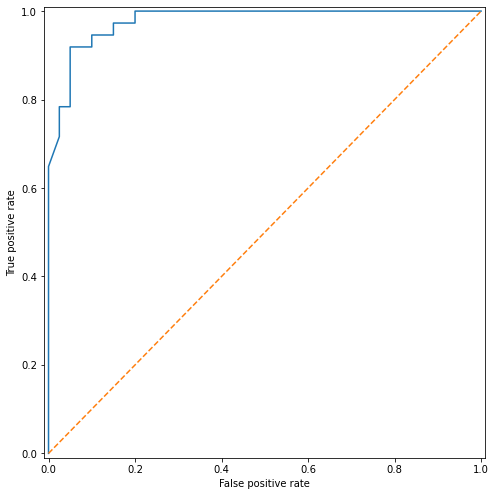

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, train_size = 0.8)
svm_c = SVC(probability=True)
%time svm_c.fit(X_train, y_train) 
y_pred = svm_c.predict(X_test)
y_prob = svm_c.predict_proba(X_test)
y_prob = [{0:y_prob[:,0][i], 1:y_prob[:,1][i]} for i in range(len(y_prob))]
print('----SVM----')
print('AUC=' + str(roc_auc_score(y_test, y_pred)) + '\n' + 'accuracy=' + str(accuracy_score(y_test, y_pred)))
plot_roc_curve(y_test, y_prob)

Wall time: 200 ms
----RFC----
AUC=0.9114864864864867
accuracy=0.9298245614035088


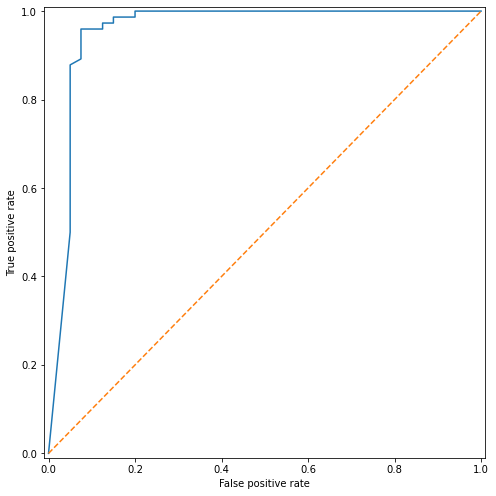

In [71]:
rfc_c = rfc()
%time rfc_c.fit(X_train, y_train) 
y_pred = rfc_c.predict(X_test)
y_prob = rfc_c.predict_proba(X_test)
y_prob = [{0:y_prob[:,0][i], 1:y_prob[:,1][i]} for i in range(len(y_prob))]
print('----RFC----')
print('AUC=' + str(roc_auc_score(y_test, y_pred)) + '\n' + 'accuracy=' + str(accuracy_score(y_test, y_pred)))
plot_roc_curve(y_test, y_prob)

## Spam dataset

Wall time: 5.91 s
----SVM----
AUC=0.6732137154138721
accuracy=0.7068403908794788


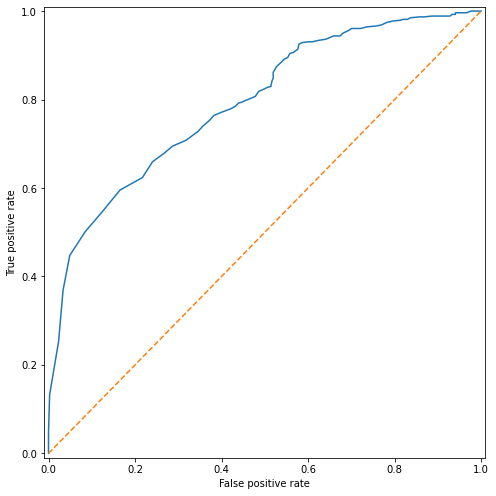

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_spam, y_spam, train_size = 0.8)
svm_c = SVC(probability=True)
%time svm_c.fit(X_train, y_train) 
y_pred = svm_c.predict(X_test)
y_prob = svm_c.predict_proba(X_test)
y_prob = [{0:y_prob[:,0][i], 1:y_prob[:,1][i]} for i in range(len(y_prob))]
print('----SVM----')
print('AUC=' + str(roc_auc_score(y_test, y_pred)) + '\n' + 'accuracy=' + str(accuracy_score(y_test, y_pred)))
plot_roc_curve(y_test, y_prob)

Wall time: 631 ms
----RFC----
AUC=0.9531690038614522
accuracy=0.9576547231270358


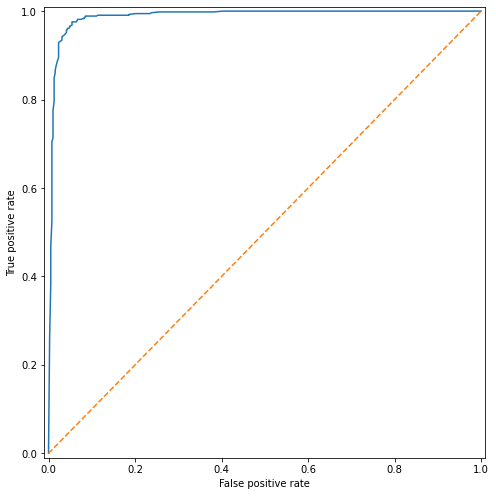

In [74]:
rfc_c = rfc()
%time rfc_c.fit(X_train, y_train) 
y_pred = rfc_c.predict(X_test)
y_prob = rfc_c.predict_proba(X_test)
y_prob = [{0:y_prob[:,0][i], 1:y_prob[:,1][i]} for i in range(len(y_prob))]
print('----RFC----')
print('AUC=' + str(roc_auc_score(y_test, y_pred)) + '\n' + 'accuracy=' + str(accuracy_score(y_test, y_pred)))
plot_roc_curve(y_test, y_prob)

### Выводы:
SVM cancer - высокая точность/скорость

RF cancer - высокая точность/скорость

SVM spam - низкая точность/скорость

RF spam - высокая точность/скорость